This file will make Figure 1 and 2 in the paper using the state variable data from data_statevariables.txt and the biomass prediction code biomass.py

In [1]:
import numpy as np
import pandas as pd
import biomass as bm
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
data = pd.read_csv('data_statevariables.csv')

In [3]:
# Now add a column for predicted numerical biomass data
data['pBnum'] = np.zeros(len(data))
# Iterate through each row and append the biomass information
for index, row in data.iterrows():
    data.loc[index,'pBnum'] = bm.biomass(row)

In [4]:
display(data)

,Site,Plot,Type,Location,Year,A_ha,A_est,S,N,E,...,pB0,pB1,lambda_1,lambda_2,beta,Notes1,Notes2,Notes3,Notes4,E_2_3
0,Point Reyes National Seashore Bishop Pines,Mt. Vision,Temperate forest community,California USA,2012,0.02560,N,27,1844,2.223879e+06,...,6.686306e+07,5.648642e+07,0.002382,0.000012,0.002395,Newman et al,Ecosphere,NaN,NaN,2.223879e+06
1,Point Reyes National Seashore Bishop Pines,Bayview,Temperate forest community,California USA,2012,0.02560,N,16,486,1.585384e+06,...,6.004039e+07,4.729688e+07,0.006116,0.000010,0.006126,Newman et al,Ecosphere,"duplicate dbh removed, uncored tree added in f...",NaN,1.585384e+06
2,Hubbard Brook Experimental Forest,Watershed 6,Temperate trees,New Hampshire USA,2017,13.23000,N,16,10230,5.532430e+04,...,3.902061e+05,3.672183e+05,-0.000224,0.000355,0.000131,https://hubbardbrook.org/watersheds/watershed-6,https://hubbardbrook.org/watersheds/watershed-...,https://portal.edirepository.org/nis/metadatav...,"had to drop all dbh and associated N, S) below...",5.532430e+04
3,Kellogg Biological Station,Deciduous Forest 1,Temperate trees,Michigan USA,2018,0.81000,Y,18,259,1.110548e+04,...,9.612714e+04,6.770949e+04,0.014893,0.001660,0.016552,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,1.110548e+04
4,Kellogg Biological Station,Deciduous Forest 2,Temperate trees,Michigan USA,2018,0.50000,Y,10,172,8.115756e+03,...,7.003256e+04,5.195158e+04,0.009766,0.001259,0.011025,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,8.115756e+03
5,Kellogg Biological Station,Deciduous Forest 3,Temperate trees,Michigan USA,2018,0.35000,Y,13,136,2.820084e+03,...,1.905795e+04,1.263401e+04,0.019693,0.004843,0.024536,https://portal.edirepository.org/nis/metadatav...,NaN,NaN,NaN,2.820084e+03
6,SCBI Large Forest Dynamics Plot,Front Royal,Temperate trees,Virginia USA,2012,25.60000,N,68,29986,1.110233e+07,...,3.088610e+08,2.855146e+08,0.000271,0.000006,0.000277,https://esapubs.org/archive/ecol/E094/195/,https://esapubs.org/archive/ecol/E094/195/meta...,NaN,NaN,1.110233e+07
7,CSIRO permanent rainforest plots of North Quee...,EP3,Tropical trees,Queensland Australia,1973,0.50000,N,67,506,4.074955e+03,...,2.077631e+04,1.252731e+04,0.021325,0.018773,0.040098,https://data.csiro.au/collections/collection/C...,NaN,NaN,NaN,4.074955e+03
8,CSIRO permanent rainforest plots of North Quee...,EP18,Tropical trees,Queensland Australia,1975,0.50000,N,79,452,3.915177e+03,...,2.125059e+04,1.162778e+04,0.036675,0.022811,0.059487,NaN,NaN,NaN,NaN,3.915177e+03
9,CSIRO permanent rainforest plots of North Quee...,EP19,Tropical trees,Queensland Australia,1977,0.50000,N,64,397,2.482458e+03,...,1.192520e+04,6.730767e+03,0.022259,0.030689,0.052947,NaN,NaN,NaN,NaN,2.482458e+03


# General plot setup

In [5]:
# Choose color scheme
cm = 'winter'#'viridis'
# Get max and min species richness for colour scheme
smin = np.min(data['S'])
smax = np.max(data['S'])
# Set up normalization
norm = plt.Normalize(np.log(smin),np.log(smax))
# Get list of site types
stype = data['Type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','D','o','X']
if len(stype) != len(mlist):
    print("ERROR: Add more markers!")

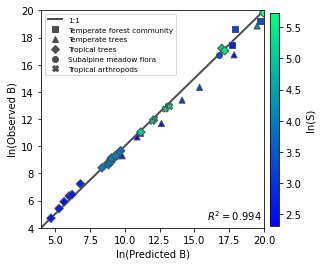

In [9]:
# Figure 1
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
xdata = np.log(data['pBnum'])
ydata = np.log(data['B'])
# Loop through each site type to put a different marker
for m,s in zip(mlist,stype):
    inds = data['Type']==s
    im = ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds]),norm=norm,cmap=cm,edgecolor='0.3')
    
# Colorbar
cax = fig.add_axes([0.92, 0.13, 0.03, 0.74])
fig.colorbar(im, cax = cax,label='ln(S)')
    
# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)

# Labels
ax.set_xlabel('ln(Predicted B)')
ax.set_ylabel('ln(Observed B)')

 # Add in R^2 value from regression
lin = linregress(xdata,ydata)
xlin = np.linspace(xmin,xmax)
ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.64,0.17),xycoords='figure fraction')
# Previous location was (0.73,0.17)

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")

# Plot 1:1 line at the back and add to legend codes
xrange = np.linspace(rmin,rmax)
leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
lcodes = np.insert(stype,0,'1:1')

ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3})#,frameon=False)#borderpad=0.0)

# Save
fig.savefig('Figures/fig1.pdf',bbox_inches='tight')

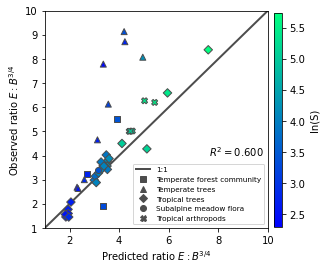

In [10]:
# Figure 2
fig,ax = plt.subplots(figsize=(4,4))

# Plot data
xdata = data['E']/data['pBnum']**(3/4)
ydata = data['E']/data['B']**(3/4)
# Loop through each site type to put a different marker
for m,s in zip(mlist,stype):
    inds = data['Type']==s
    im = ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.log(data['S'][inds]),norm=norm,cmap=cm,edgecolor='0.3')

# Colorbar
cax = fig.add_axes([0.92, 0.13, 0.03, 0.74])
fig.colorbar(im, cax = cax,label='ln(S)')

# Set range
ymin = np.floor(np.min(ydata))
ymax = np.ceil(np.max(ydata))
xmin = np.floor(np.min(xdata))
xmax = np.ceil(np.max(xdata))
# Set range min as min of those
rmin = np.min([ymin,xmin])
rmax = np.max([ymax,xmax])
ax.set_ylim(rmin,rmax)
ax.set_xlim(rmin,rmax)

# Labels
ax.set_xlabel(r'Predicted ratio $E:B^{3/4}$')
ax.set_ylabel(r'Observed ratio $E:B^{3/4}$')

# Add in R^2 value from regression
lin = linregress(xdata,ydata)
xlin = np.linspace(xmin,xmax)
ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.64,0.42),xycoords='figure fraction')
# Previous location was (0.18,0.87)

# Legend
# Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
leg = {}
for m,s in zip(mlist,stype):
    leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")
    
# Plot 1:1 line at the back and add to legend codes
xrange = np.linspace(rmin,rmax)
leg['1:1'], = ax.plot(xrange,xrange,lw=2,c='0.3',zorder=0)#,label='1:1 line') # Can add this back in
lcodes = np.insert(stype,0,'1:1')

ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3},loc='lower right')#,frameon=False#borderpad=0.0)

# Save
fig.savefig('Figures/fig2.pdf',bbox_inches='tight')